In [2]:
#In this example, support vector classifier is used as for multivariable classification
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

In [3]:
path = ''
file = 'Placement_Data_Full_Class.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [6]:
#dependent variable that will be predicted
var = 'hsc_s'

X = df.drop([var], axis=1)
X = pd.get_dummies(X) #this is necessary because otherwise the SVC can not convert string to float

# Select the dependent variable
y = df[var] 

# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary  gender_F  \
0        1  67.00  91.00     58.00     55.0  58.80  270000.0         0   
1        2  79.33  78.33     77.48     86.5  66.28  200000.0         0   
2        3  65.00  68.00     64.00     75.0  57.80  250000.0         0   
4        5  85.80  73.60     73.30     96.8  55.50  425000.0         0   
7        8  82.00  64.00     66.00     67.0  62.14  252000.0         0   
..     ...    ...    ...       ...      ...    ...       ...       ...   
209    210  62.00  72.00     65.00     67.0  56.49  216000.0         0   
210    211  80.60  82.00     77.60     91.0  74.49  400000.0         0   
211    212  58.00  60.00     72.00     74.0  53.62  275000.0         0   
212    213  67.00  67.00     73.00     59.0  69.72  295000.0         0   
213    214  74.00  66.00     58.00     70.0  60.23  204000.0         1   

     gender_M  ssc_b_Central  ...  hsc_b_Central  hsc_b_Others  \
0           1              0  ...            

In [4]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)

In [6]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [7]:
#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred, average='weighted')
pres = precision_score(y_test, y_pred, average='weighted')

F1_score = 2/((1/rec) + (1/pres))

print("The recall is: ", rec)
print("The precision is: ", pres)
print("The F1-score is: ", F1_score)

The recall is:  0.5333333333333333
The precision is:  0.28444444444444444
The F1-score is:  0.3710144927536232


/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


object


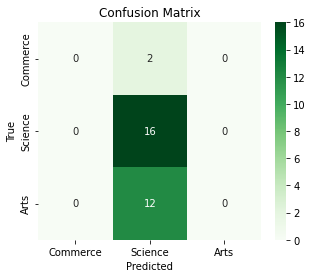

In [8]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = df[var].unique()
print(class_labels.dtype)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()